In [1]:
import os
import pandas as pd
import platform
from anatomy.anatomy_api import AnatomyApi
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
if platform.system() == 'Darwin':
    path = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN'
elif platform.system() == 'Windows':
    path = r'C:\Users\jenniferwh\Dropbox (Allen Institute)\Mesoscale Connectome Papers in Progress\2019 DMN'
savepath = os.path.join(path, '_new_figures', 'Figure_5')

In [2]:
aapi = AnatomyApi()
ss = aapi.get_summary_structure_data('id')
mcc = MouseConnectivityCache(manifest_file = '../connectivity/mouse_connectivity_manifest.json')
structure_tree = mcc.get_structure_tree()
isocortex = structure_tree.get_structures_by_acronym(['Isocortex'])[0]
cla = structure_tree.get_structures_by_acronym(['CLA'])[0]['id']
HPF = structure_tree.get_structures_by_acronym(['HPF'])[0]
iso = structure_tree.descendant_ids([isocortex['id']])[0]
iso = [structure for structure in iso if structure in ss]
hipp = structure_tree.descendant_ids([HPF['id']])[0]
hipp = [structure for structure in hipp if structure in ss]
ia_map = structure_tree.get_id_acronym_map()
ai_map = {value:key for key, value in ia_map.items()}
ctx_strs = [ai_map[structure] for structure in iso]
hipp_strs = [ai_map[structure] for structure in hipp]
valid_strs = ctx_strs+hipp_strs #No Cla

In [3]:
td_dataset = pd.read_csv(os.path.join(savepath, 'td_matches_for_rabies.csv'))
td_dataset['tracer_type'] = 'CAV'
print(len(td_dataset))

14


In [4]:
rabies_dat = pd.read_csv(os.path.join(path, 
                                      'data_files', 
                                      'rabies_experiments_sources_targets_GLM_target_removed.csv'))
rabies_dat.rename(columns = {'id': 'image_series_id',
                             'primary-source-abbrev': 'source',
                             'injection dmn fraction target removed': 'injection dmn fraction',
                            'projection dmn fraction target removed': 'projection dmn fraction',
                            'primary target acronym': 'target_by_polygon',
                            'DMN coefficient target removed': 'DMN coefficient'},
                 inplace = True)
rabies_dat = rabies_dat[rabies_dat['source'].isin(['RSPv', 'ACAv', 'ACAd'])]
rabies_dat = rabies_dat[rabies_dat['target_by_polygon'].isin(['RSPv', 'VISp', 'ACAv'])]
rabies_dat['tracer_type'] = 'rabies'

In [5]:
dat = pd.concat([td_dataset[['image_series_id', 'source', 'target_by_polygon',
                            'injection dmn fraction', 'projection dmn fraction',
                            'DMN coefficient', 'tracer_type']],
                rabies_dat[['image_series_id', 'source', 'target_by_polygon',
                            'injection dmn fraction', 'projection dmn fraction',
                            'DMN coefficient', 'tracer_type']]])
dat.loc[dat['source'].isin(['ACAd', 'ACAv']), 'td_type'] = 'ACA_RSP'
dat.loc[(dat['source'] == 'RSPv') & (dat['target_by_polygon'].isin(['ACAd', 'ACAv'])), 
       'td_type'] = 'RSPv_ACA'
# including one VISpl experiment that was move VISp, but not the others that look like 
# RSPv-ACA projection type
dat.loc[(dat['source'] == 'RSPv') & (dat['target_by_polygon'].isin(['VISp', 'VISpl'])), 
       'td_type'] = 'RSPv_VISp'

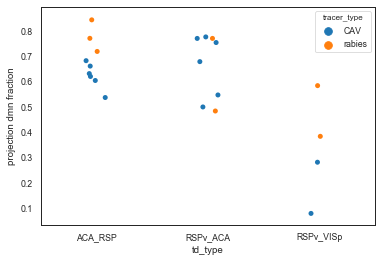

In [6]:
sns.stripplot('td_type', 'projection dmn fraction', data = dat, hue = 'tracer_type')

In [7]:
dat.groupby(['source', 'target_by_polygon']).count()

image_series_id  injection dmn fraction  \
source target_by_polygon                                            
ACAd   RSPagl                           1                       1   
       RSPv                             4                       4   
ACAv   RSPagl                           1                       1   
       RSPd                             1                       1   
       RSPv                             2                       2   
RSPv   ACAd                             5                       5   
       ACAv                             3                       3   
       VISp                             3                       3   
       VISpl                            1                       1   

                          projection dmn fraction  DMN coefficient  \
source target_by_polygon                                             
ACAd   RSPagl                                   1                1   
       RSPv                                     4                4   
ACAv   RSPagl                                   1                1   
       RSPd                                     1                1   
       RSPv                                     2                2   
RSPv   ACAd                                     5                5   
       ACAv                                     3                3   
       VISp                                     3                3   
       VISpl                                    1                1   

                          tracer_type  td_type  
source target_by_polygon                        
ACAd   RSPagl                       1        1  
       RSPv                         4        4  
ACAv   RSPagl                       1        1  
       RSPd                         1        1  
       RSPv                         2        2  
RSPv   ACAd                         5        5  
       ACAv                         3        3  
       VISp                         3        3  
       VISpl                        1        1